# MNIST

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False):
             precision    recall  f1-score   support

          3       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         1


Confusion matrix:
[[1]]


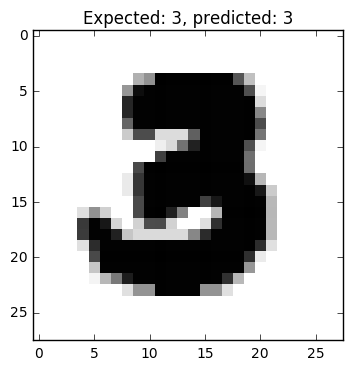

In [13]:
import os

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from mnist_reader import read_data_sets

def flatten_images(images):
    img_ret = list()
    for index, (image) in enumerate(images[:]):
        img_ret.append(image.reshape(-1))

    return numpy.array(img_ret)


def train_mnist(images_to_train, labels_to_train):
    data = flatten_images(images_to_train)
    trained_classifier = RandomForestClassifier(n_estimators=10)
    trained_classifier.fit(data, labels_to_train)
    joblib.dump(trained_classifier, MNIST_MODEL_NAME)
    return trained_classifier


def show_image(image, label, predicted_label):
    plt.plot(label)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Expected: ' + str(label) + ', predicted: ' + str(predicted_label[0]))
    plt.show()


def predict_single_number(image_data, expected_label, image):
    predicted_single_number = classifier.predict([image_data])
    print("Classification report for classifier %s:\n%s\n" %
          (classifier, metrics.classification_report([expected_label], predicted_single_number)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix([expected_label], predicted_single_number))
    show_image(image, expected_label, predicted_single_number)


def predict_full_validation_set(validation_set, validation_labels):
    predicted = classifier.predict(validation_set)
    print("Classification report for classifier %s:\n%s\n" %
          (classifier, metrics.classification_report(validation_labels, predicted)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(validation_labels, predicted))


# You can change this index to anything between 0 and 9999
PICTURE_INDEX_TO_PREDICT = 200
    
mnist_data = read_data_sets()

validation_images = mnist_data[2]
validation_labels = mnist_data[3]

validation_data = flatten_images(validation_images)

classifier = train_mnist(mnist_data[0], mnist_data[1])

predict_single_number(
                    validation_data[PICTURE_INDEX_TO_PREDICT], 
                    validation_labels[PICTURE_INDEX_TO_PREDICT], 
                    validation_images[PICTURE_INDEX_TO_PREDICT]
                     )

#predict_full_validation_set(validation_data, validation_labels)


